# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
import datetime

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = print(f"Processing Record {record_count}  of Set {set_count} | {city}.")

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_response["coord"]["lat"]
        city_lng = weather_response["coord"]["lon"]
        city_max_temp = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        city_humidity = weather_response["main"]["humidity"]
        city_clouds = weather_response["clouds"]["all"]
        city_wind = weather_response["wind"]["speed"]
        city_country = weather_response["sys"]["country"]
        city_date = datetime.datetime.fromtimestamp(weather_response["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2  of Set 1 | bredasdorp.
Processing Record 2 of Set 1 | ternate
Processing Record 3  of Set 1 | ternate.
Processing Record 3 of Set 1 | saipan
Processing Record 4  of Set 1 | saipan.
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5  of Set 1 | ribeira grande.
Processing Record 5 of Set 1 | lorengau
Processing Record 6  of Set 1 | lorengau.
Processing Record 6 of Set 1 | karachi
Processing Record 7  of Set 1 | karachi.
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8  of Set 1 | port-aux-francais.
Processing Record 8 of Set 1 | iqaluit
Processing Record 9  of Set 1 | iqaluit.
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10  of Set 1 | edinburgh of the seven seas.
Processing Record 10 of Set 1 | touros
Processing Record 11  of Set 1 | touros.
Processing Record 11 of Set 1 | grytviken
Processing Record

In [7]:
city_data

[{'City': 'bredasdorp',
  'Lat': -34.5322,
  'Lng': 20.0403,
  'Max Temp': 57.811999999999955,
  'Humidity': 75,
  'Cloudiness': 78,
  'Wind Speed': 10.56,
  'Country': 'ZA',
  'Date': datetime.datetime(2023, 6, 12, 21, 44, 5)},
 {'City': 'ternate',
  'Lat': 0.8,
  'Lng': 127.4,
  'Max Temp': 80.20399999999995,
  'Humidity': 85,
  'Cloudiness': 79,
  'Wind Speed': 2.78,
  'Country': 'ID',
  'Date': datetime.datetime(2023, 6, 12, 21, 45, 38)},
 {'City': 'saipan',
  'Lat': 15.1355,
  'Lng': 145.701,
  'Max Temp': 88.77200000000005,
  'Humidity': 100,
  'Cloudiness': 40,
  'Wind Speed': 5.66,
  'Country': 'MP',
  'Date': datetime.datetime(2023, 6, 12, 21, 42, 49)},
 {'City': 'ribeira grande',
  'Lat': 38.5167,
  'Lng': -28.7,
  'Max Temp': 67.04600000000005,
  'Humidity': 97,
  'Cloudiness': 10,
  'Wind Speed': 0.45,
  'Country': 'PT',
  'Date': datetime.datetime(2023, 6, 12, 21, 44, 4)},
 {'City': 'lorengau',
  'Lat': -2.0226,
  'Lng': 147.2712,
  'Max Temp': 85.73000000000005,
  'Humidi

In [13]:
df = pd.DataFrame (city_data)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,57.812,75,78,10.56,ZA,2023-06-12 21:44:05
1,ternate,0.8000,127.4000,80.204,85,79,2.78,ID,2023-06-12 21:45:38
2,saipan,15.1355,145.7010,88.772,100,40,5.66,MP,2023-06-12 21:42:49
3,ribeira grande,38.5167,-28.7000,67.046,97,10,0.45,PT,2023-06-12 21:44:04
4,lorengau,-2.0226,147.2712,85.730,74,62,4.72,PG,2023-06-12 21:45:38
...,...,...,...,...,...,...,...,...,...
574,benjamin constant,-4.3831,-70.0311,77.396,98,39,0.62,BR,2023-06-12 21:53:16
575,muskogee,35.5834,-95.3336,68.288,88,0,2.57,US,2023-06-12 21:52:20
576,mamuju,-2.6748,118.8885,84.668,75,14,2.17,ID,2023-06-12 21:53:28
577,fang,19.9169,99.2145,79.340,87,100,1.26,TH,2023-06-12 21:53:28


In [17]:
# Export the City_Data into a csv
df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,57.812,75,78,10.56,ZA,2023-06-12 21:44:05
1,ternate,0.8000,127.4000,80.204,85,79,2.78,ID,2023-06-12 21:45:38
2,saipan,15.1355,145.7010,88.772,100,40,5.66,MP,2023-06-12 21:42:49
3,ribeira grande,38.5167,-28.7000,67.046,97,10,0.45,PT,2023-06-12 21:44:04
4,lorengau,-2.0226,147.2712,85.730,74,62,4.72,PG,2023-06-12 21:45:38


In [28]:
df["Lat"]

City_ID
0     -34.5322
1       0.8000
2      15.1355
3      38.5167
4      -2.0226
        ...   
574    -4.3831
575    35.5834
576    -2.6748
577    19.9169
578    53.5347
Name: Lat, Length: 579, dtype: float64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

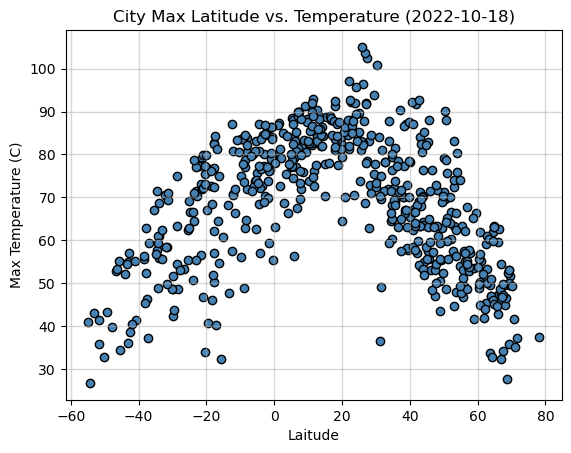

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(df["Lat"], df["Max Temp"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

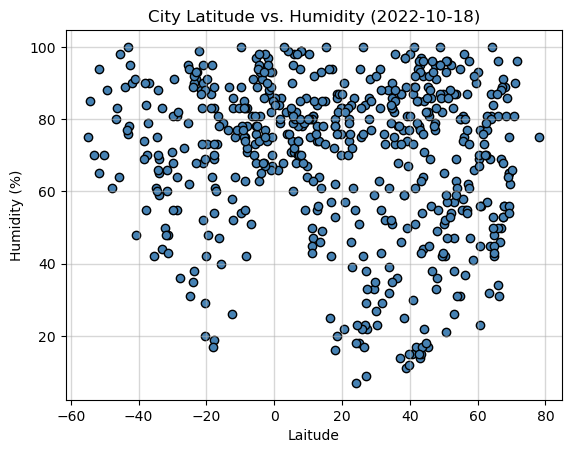

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(df["Lat"], df["Humidity"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

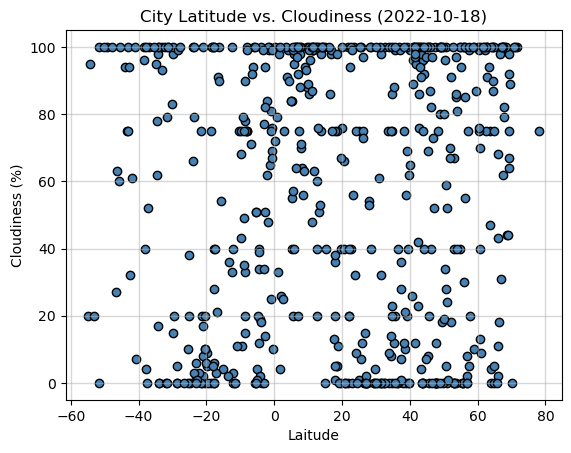

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(df["Lat"], df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

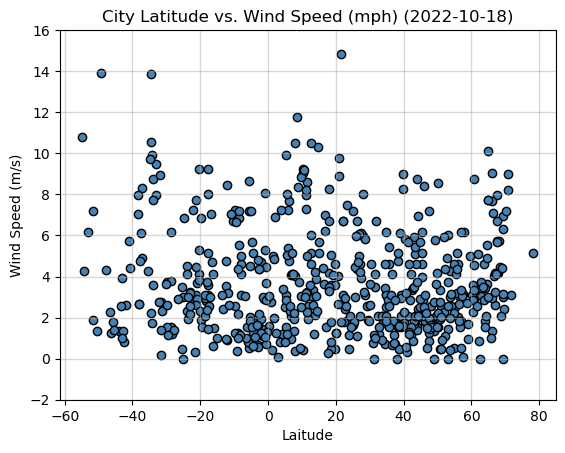

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(df["Lat"], df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (mph) (2022-10-18)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-2,16)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def linear_agression(x,y):
    print(f"The r-squared is : {round(linregress(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ternate,0.8000,127.4000,80.204,85,79,2.78,ID,2023-06-12 21:45:38
2,saipan,15.1355,145.7010,88.772,100,40,5.66,MP,2023-06-12 21:42:49
3,ribeira grande,38.5167,-28.7000,67.046,97,10,0.45,PT,2023-06-12 21:44:04
5,karachi,24.9056,67.0822,89.690,51,75,7.20,PK,2023-06-12 21:40:40
7,iqaluit,63.7506,-68.5145,33.800,69,75,4.63,CA,2023-06-12 21:44:00


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,57.812,75,78,10.56,ZA,2023-06-12 21:44:05
4,lorengau,-2.0226,147.2712,85.730,74,62,4.72,PG,2023-06-12 21:45:38
6,port-aux-francais,-49.3500,70.2167,43.358,88,100,13.91,TF,2023-06-12 21:43:59
8,edinburgh of the seven seas,-37.0676,-12.3116,59.468,90,100,8.33,SH,2023-06-12 21:44:00
9,touros,-5.1989,-35.4608,75.596,89,4,4.53,BR,2023-06-12 21:44:28


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is : -0.58


Text(0, 0.5, 'Max Temp (F)')

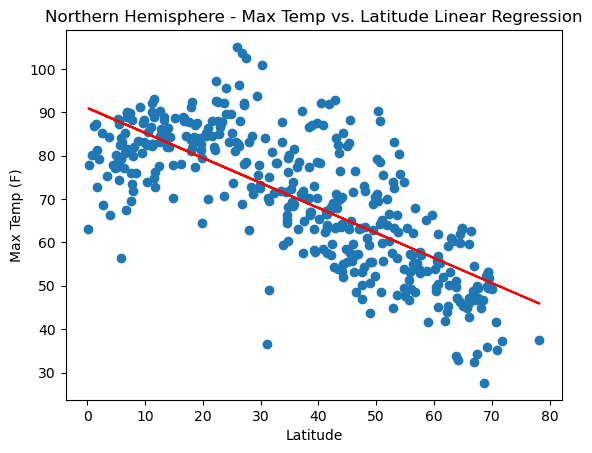

In [49]:
# Linear regression on Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])


annotate(equation, 0, 0)


plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Max Temp (F)")




The r-squared is : 0.71


Text(0, 0.5, 'Max Temp (F)')

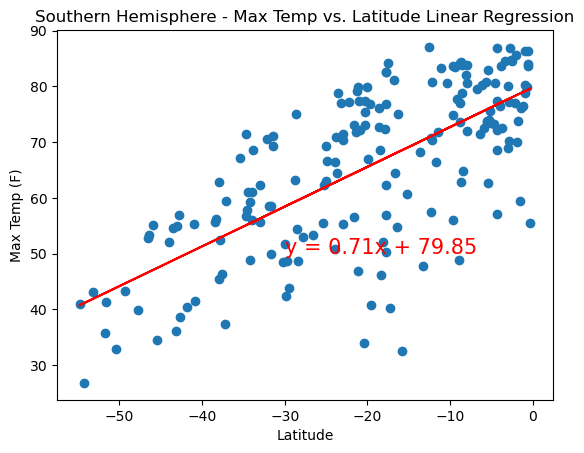

In [50]:
# Linear regression on Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])


annotate(equation, -30, 50)


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Max Temp (F)")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : -0.12


Text(0, 0.5, 'Humidity')

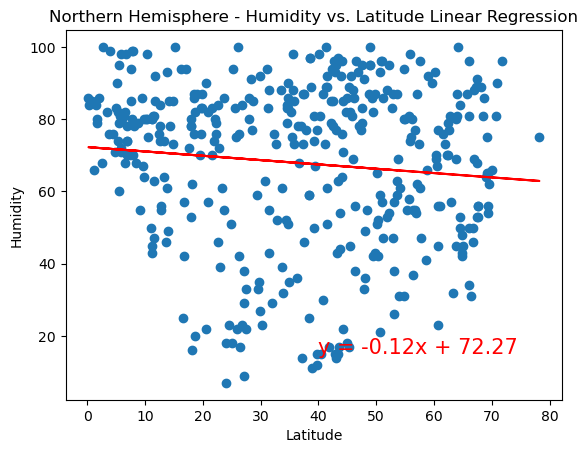

In [51]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])


annotate(equation, 40, 15)


plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Humidity")



The r-squared is : 0.13


Text(0, 0.5, 'Humidity')

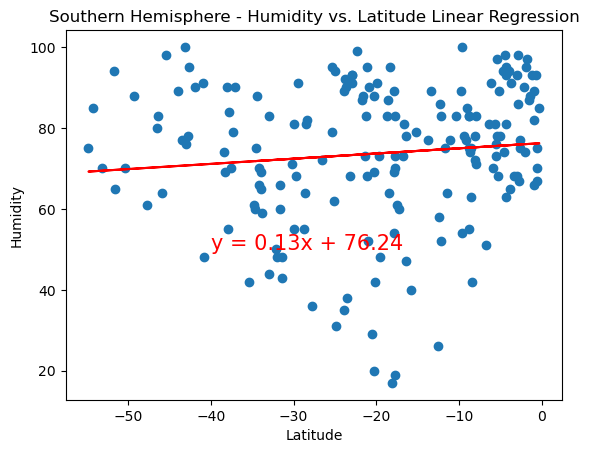

In [52]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])


annotate(equation, -40, 50)


plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Humidity")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : -0.1


Text(0, 0.5, 'Cloudiness')

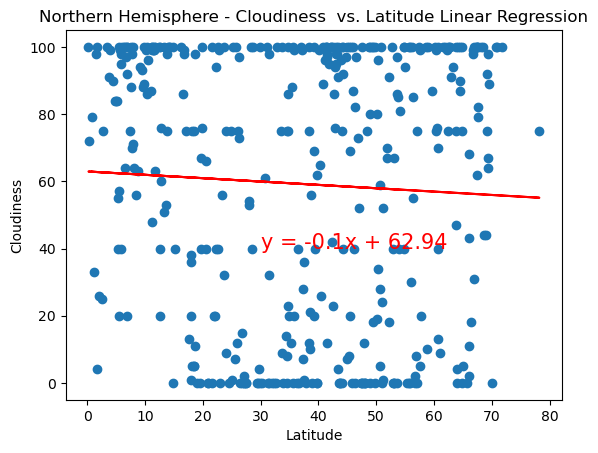

In [53]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])


annotate(equation, 30, 40)


plt.title("Northern Hemisphere - Cloudiness  vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Cloudiness")




The r-squared is : -0.29


Text(0, 0.5, 'Cloudiness')

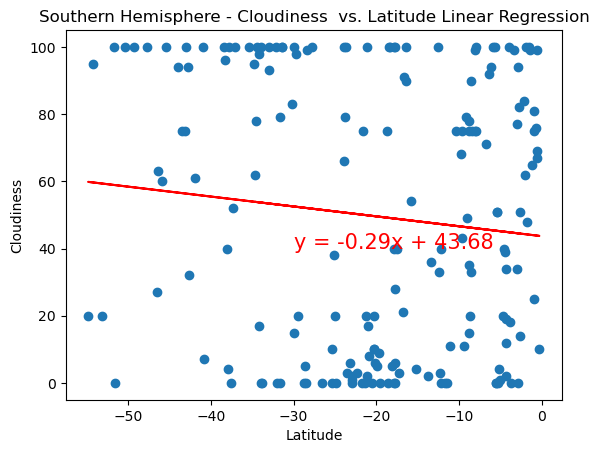

In [54]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])


annotate(equation, -30, 40)


plt.title("Southern Hemisphere - Cloudiness  vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Cloudiness")




**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : -0.01


Text(0, 0.5, 'Wind Speed')

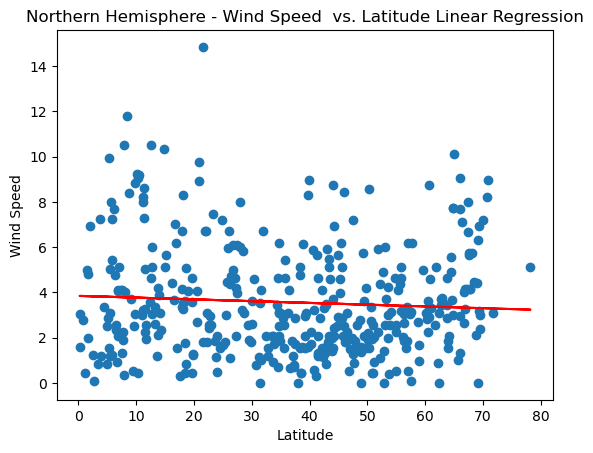

In [55]:
# Northern Hemisphere

equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])


annotate(equation, 40, 20)


plt.title("Northern Hemisphere - Wind Speed  vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Wind Speed")




The r-squared is : -0.04


Text(0, 0.5, 'Wind Speed')

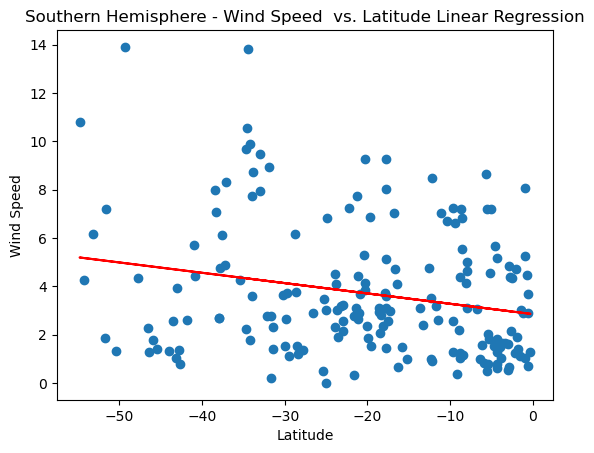

In [56]:
# Southern Hemisphere

equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])


annotate(equation, -30, 15)


plt.title("Southern Hemisphere - Wind Speed  vs. Latitude Linear Regression")


plt.xlabel("Latitude")


plt.ylabel("Wind Speed")




**Discussion about the linear relationship:** YOUR RESPONSE HERE